<a href="https://colab.research.google.com/github/ahmedhussin12/Students-Performance/blob/main/Students_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying to explore the relation between scores students get and some information about them such as gender,parental level of education, what they eat etc.
This dataset was downloaded from **kaggle** 
It has 1000 rows and 8 columns.
Each row represent student . 

First thing to do is to import the proper libraries. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

loading data using **pandas**...

In [2]:
data= pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
print(data)

     gender race/ethnicity  ... reading score writing score
0    female        group B  ...            72            74
1    female        group C  ...            90            88
2    female        group B  ...            95            93
3      male        group A  ...            57            44
4      male        group C  ...            78            75
..      ...            ...  ...           ...           ...
995  female        group E  ...            99            95
996    male        group C  ...            55            55
997  female        group C  ...            71            65
998  female        group D  ...            78            77
999  female        group D  ...            86            86

[1000 rows x 8 columns]


cleanig data...

In [5]:
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [11]:
data= data.drop(['test preparation course','race/ethnicity'],axis=1)

Encoding the **object** datatype to **numerical** type...

In [17]:
object_data= data.select_dtypes(include=[object])
le=preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
  object_data.iloc[:,i]=le.fit_transform( object_data.iloc[:,i])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [21]:
num_data=data.select_dtypes(exclude=[object])
data=pd.concat([object_data,num_data],axis=1)

Explore the relations using **seaborn**

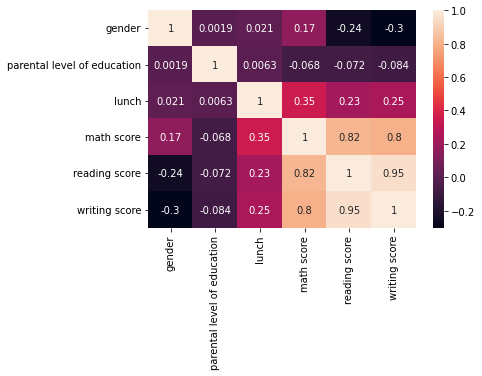

In [22]:
c=data.corr()
sns.heatmap(c,annot=True)
plt.show()

**Results:**

1. the results show a strong relation between the reading score and writing score.  
2. there is a noticed negative relation between gender and the writing score.
3. there is a strong relation between reading - writing score and math score .
4. there is a surprising relation between the lunch and math score which is not expected.
5. parental level of education is almost has no effection .

